# **Feature Explanation**

* X1 net profit / total assets
* X2 total liabilities / total assets
* X3 working capital / total assets
* X4 current assets / short-term liabilities
* X5 [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365
* X6 retained earnings / total assets
* X7 EBIT / total assets
* X8 book value of equity / total liabilities
* X9 sales / total assets
* X10 equity / total assets
* X11 (gross profit + extraordinary items + financial expenses) / total assets
* X12 gross profit / short-term liabilities
* X13 (gross profit + depreciation) / sales
* X14 (gross profit + interest) / total assets
* X15 (total liabilities * 365) / (gross profit + depreciation) (Leverage Ratio)
* X16 (gross profit + depreciation) / total liabilities
* X17 total assets / total liabilities
* X18 gross profit / total assets (Gross Profitability Ratio)
* X19 gross profit / sales
* X20 (inventory * 365) / sales
* X21 sales (n) / sales (n-1)
* X22 profit on operating activities / total assets (Return on Investments)
* X23 net profit / sales
* X24 gross profit (in 3 years) / total assets
* X25 (equity - share capital) / total assets (Adjusted share of equity in financing of assets)
* X26 (net profit + depreciation) / total liabilities
* X27 profit on operating activities / financial expenses (Financial Expenses Coverage Ratio)
* X28 working capital / fixed assets
* X29 logarithm of total assets (Firm Size)
* X30 (total liabilities - cash) / sales
* X31 (gross profit + interest) / sales
* X32 (current liabilities * 365) / cost of products sold
* X33 operating expenses / short-term liabilities
* X34 operating expenses / total liabilities
* X35 profit on sales / total assets
* X36 total sales / total assets
* X37 (current assets - inventories) / long-term liabilities
* X38 constant capital / total assets
* X39 profit on sales / sales
* X40 (current assets - inventory - receivables) / short-term liabilities (Current Ratio)
* X41 total liabilities / ((profit on operating activities + depreciation) * (12/365))
* X42 profit on operating activities / sales (Return On Sales)
* X43 rotation receivables + inventory turnover in days
* X44 (receivables * 365) / sales
* X45 net profit / inventory
* X46 (current assets - inventory) / short-term liabilities
* X47 (inventory * 365) / cost of products sold (Inventory Ratio in Days)
* X48 EBITDA (profit on operating activities - depreciation) / total assets
* X49 EBITDA (profit on operating activities - depreciation) / sales
* X50 current assets / total liabilities
* X51 short-term liabilities / total assets
* X52 (short-term liabilities * 365) / cost of products sold) (Liabilities Turnover Ratio)
* X53 equity / fixed assets
* X54 constant capital / fixed assets
* X55 working capital
* X56 (sales - cost of products sold) / sales
* X57 (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)
* X58 total costs /total sales
* X59 long-term liabilities / equity
* X60 sales / inventory
* X61 sales / receivables
* X62 (short-term liabilities *365) / sales
* X63 sales / short-term liabilities
* X64 sales / fixed assets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
%matplotlib inline

# Train_Test_Split
from sklearn.model_selection import train_test_split

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.svm import SVC

# Misc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.metrics import classification_report, confusion_matrix
from impyute.imputation.cs import mice
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [2]:
data_1 = arff.loadarff('1year.arff')
data_2 = arff.loadarff('2year.arff')
data_3 = arff.loadarff('3year.arff')
data_4 = arff.loadarff('4year.arff')
data_5 = arff.loadarff('5year.arff')

In [3]:
df_5 = pd.DataFrame(data_5[0])
df_4 = pd.DataFrame(data_4[0])
df_3 = pd.DataFrame(data_3[0])
df_2 = pd.DataFrame(data_2[0])
df_1 = pd.DataFrame(data_1[0])

In [4]:
df_1.replace({'class': b'1'}, int(1), inplace=True)
df_1.replace({'class': b'0'}, int(0), inplace=True)
df_2.replace({'class': b'1'}, int(1), inplace=True)
df_2.replace({'class': b'0'}, int(0), inplace=True)
df_3.replace({'class': b'1'}, int(1), inplace=True)
df_3.replace({'class': b'0'}, int(0), inplace=True)
df_4.replace({'class': b'1'}, int(1), inplace=True)
df_4.replace({'class': b'0'}, int(0), inplace=True)
df_5.replace({'class': b'1'}, int(1), inplace=True)
df_5.replace({'class': b'0'}, int(0), inplace=True)

In [5]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5], 0)
df = df.reset_index(drop = True)

In [6]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   43397 non-null  float64
 1   Attr2   43397 non-null  float64
 2   Attr3   43397 non-null  float64
 3   Attr4   43271 non-null  float64
 4   Attr5   43316 non-null  float64
 5   Attr6   43397 non-null  float64
 6   Attr7   43397 non-null  float64
 7   Attr8   43311 non-null  float64
 8   Attr9   43396 non-null  float64
 9   Attr10  43397 non-null  float64
 10  Attr11  43361 non-null  float64
 11  Attr12  43271 non-null  float64
 12  Attr13  43278 non-null  float64
 13  Attr14  43397 non-null  float64
 14  Attr15  43369 non-null  float64
 15  Attr16  43310 non-null  float64
 16  Attr17  43311 non-null  float64
 17  Attr18  43397 non-null  float64
 18  Attr19  43277 non-null  float64
 19  Attr20  43278 non-null  float64
 20  Attr21  37551 non-null  float64
 21  Attr22  43397 non-null  float64
 22

In [8]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,43397.000000,43397.000000,43397.000000,43271.000000,4.331600e+04,43397.000000,43397.000000,43311.000000,43396.000000,43397.000000,...,4.327800e+04,43398.000000,4.332100e+04,43398.000000,4.125300e+04,43303.000000,4.327800e+04,43271.000000,42593.000000,43405.000000
mean,0.035160,0.590212,0.114431,6.314702,-3.853466e+02,-0.056107,0.093478,12.640779,2.652166,0.626868,...,-2.621959e+01,-0.010510,3.002644e+01,1.333288,4.480858e+02,17.033202,1.502328e+03,9.343074,72.788592,0.048174
std,2.994109,5.842748,5.439429,295.434425,6.124303e+04,7.201326,5.713075,505.894281,62.932732,14.670597,...,5.327862e+03,13.674072,5.334454e+03,122.104445,3.234560e+04,553.049406,1.392667e+05,124.177354,2369.339482,0.214137
min,-463.890000,-430.870000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-517.480000,-141.410000,-3.496000,-479.910000,...,-1.108300e+06,-1667.300000,-1.986900e+02,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003429,0.268980,0.021521,1.049500,-4.908000e+01,0.000000,0.005776,0.430275,1.018500,0.295470,...,9.348500e-03,0.014649,8.753200e-01,0.000000,5.545500e+00,4.510150,4.214400e+01,3.097650,2.176800,0.000000
50%,0.049660,0.471900,0.196610,1.569800,-1.034500e+00,0.000000,0.059634,1.070400,1.195350,0.505970,...,5.294300e-02,0.119670,9.509600e-01,0.006366,9.791700e+00,6.636300,7.132600e+01,5.087600,4.282500,0.000000
75%,0.129580,0.688320,0.403390,2.787450,5.063425e+01,0.089446,0.150880,2.615700,2.062500,0.709100,...,1.290975e-01,0.284605,9.926400e-01,0.236052,2.018100e+01,10.394500,1.172200e+02,8.598850,9.776200,0.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,543.250000,649.230000,53432.000000,9742.300000,1099.500000,...,2.931500e+02,552.640000,1.108300e+06,23853.000000,4.818700e+06,108000.000000,2.501600e+07,23454.000000,294770.000000,1.000000


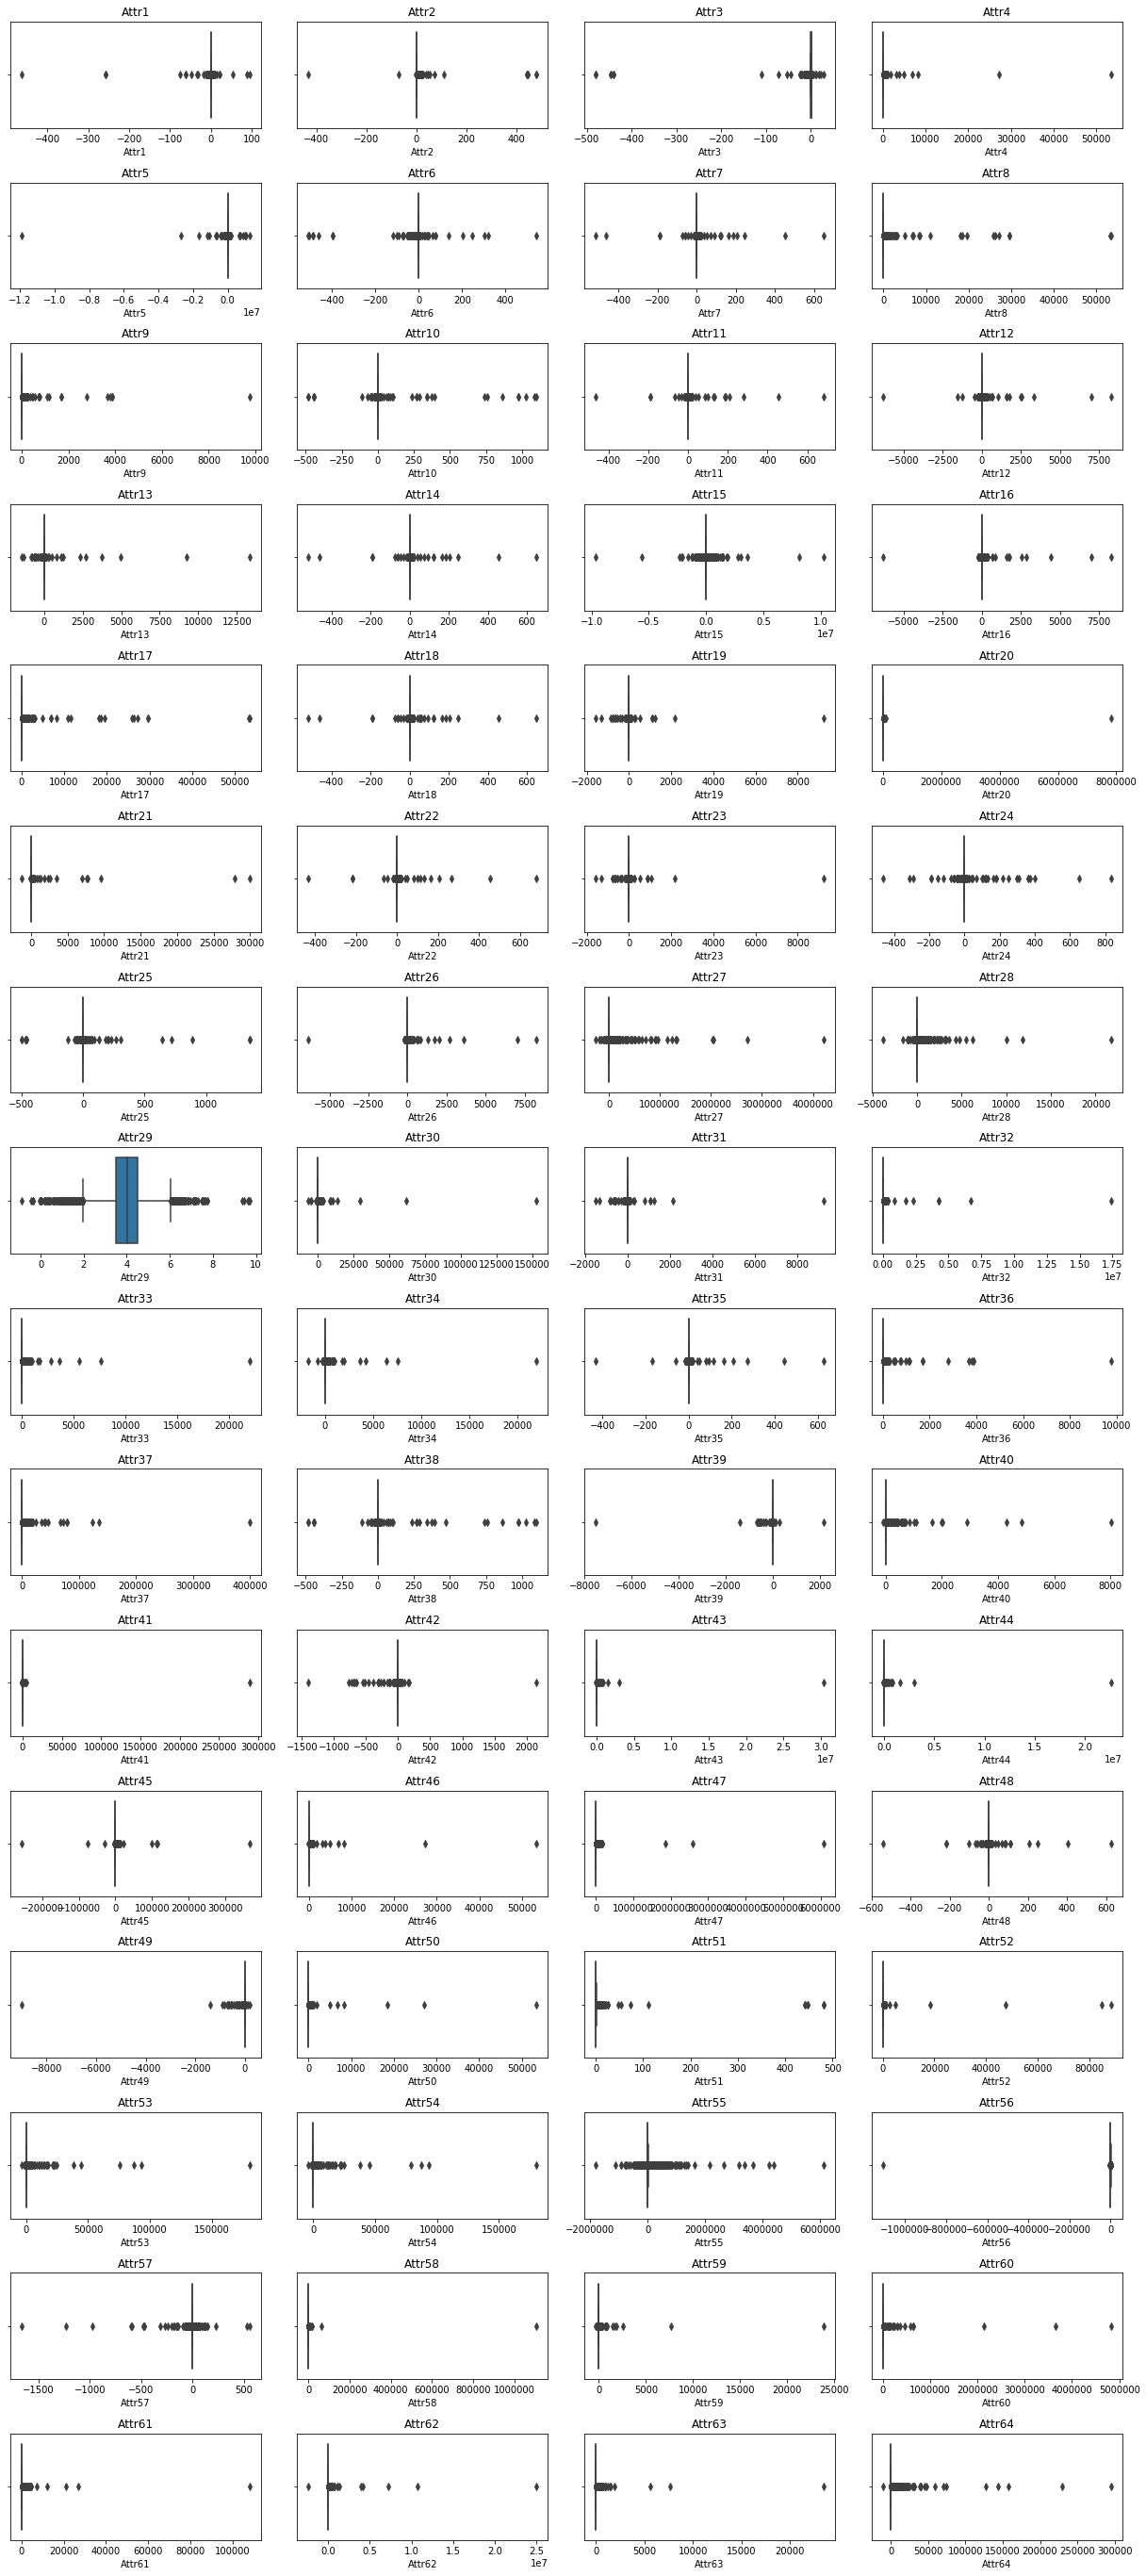

In [37]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

column = df.columns

plt.figure(figsize = (17, 40))
for i, col in zip(range (1, len(df.columns)), column):
    plt.subplot(math.ceil(len(df.columns) / 4), 4, i)
    sns.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()

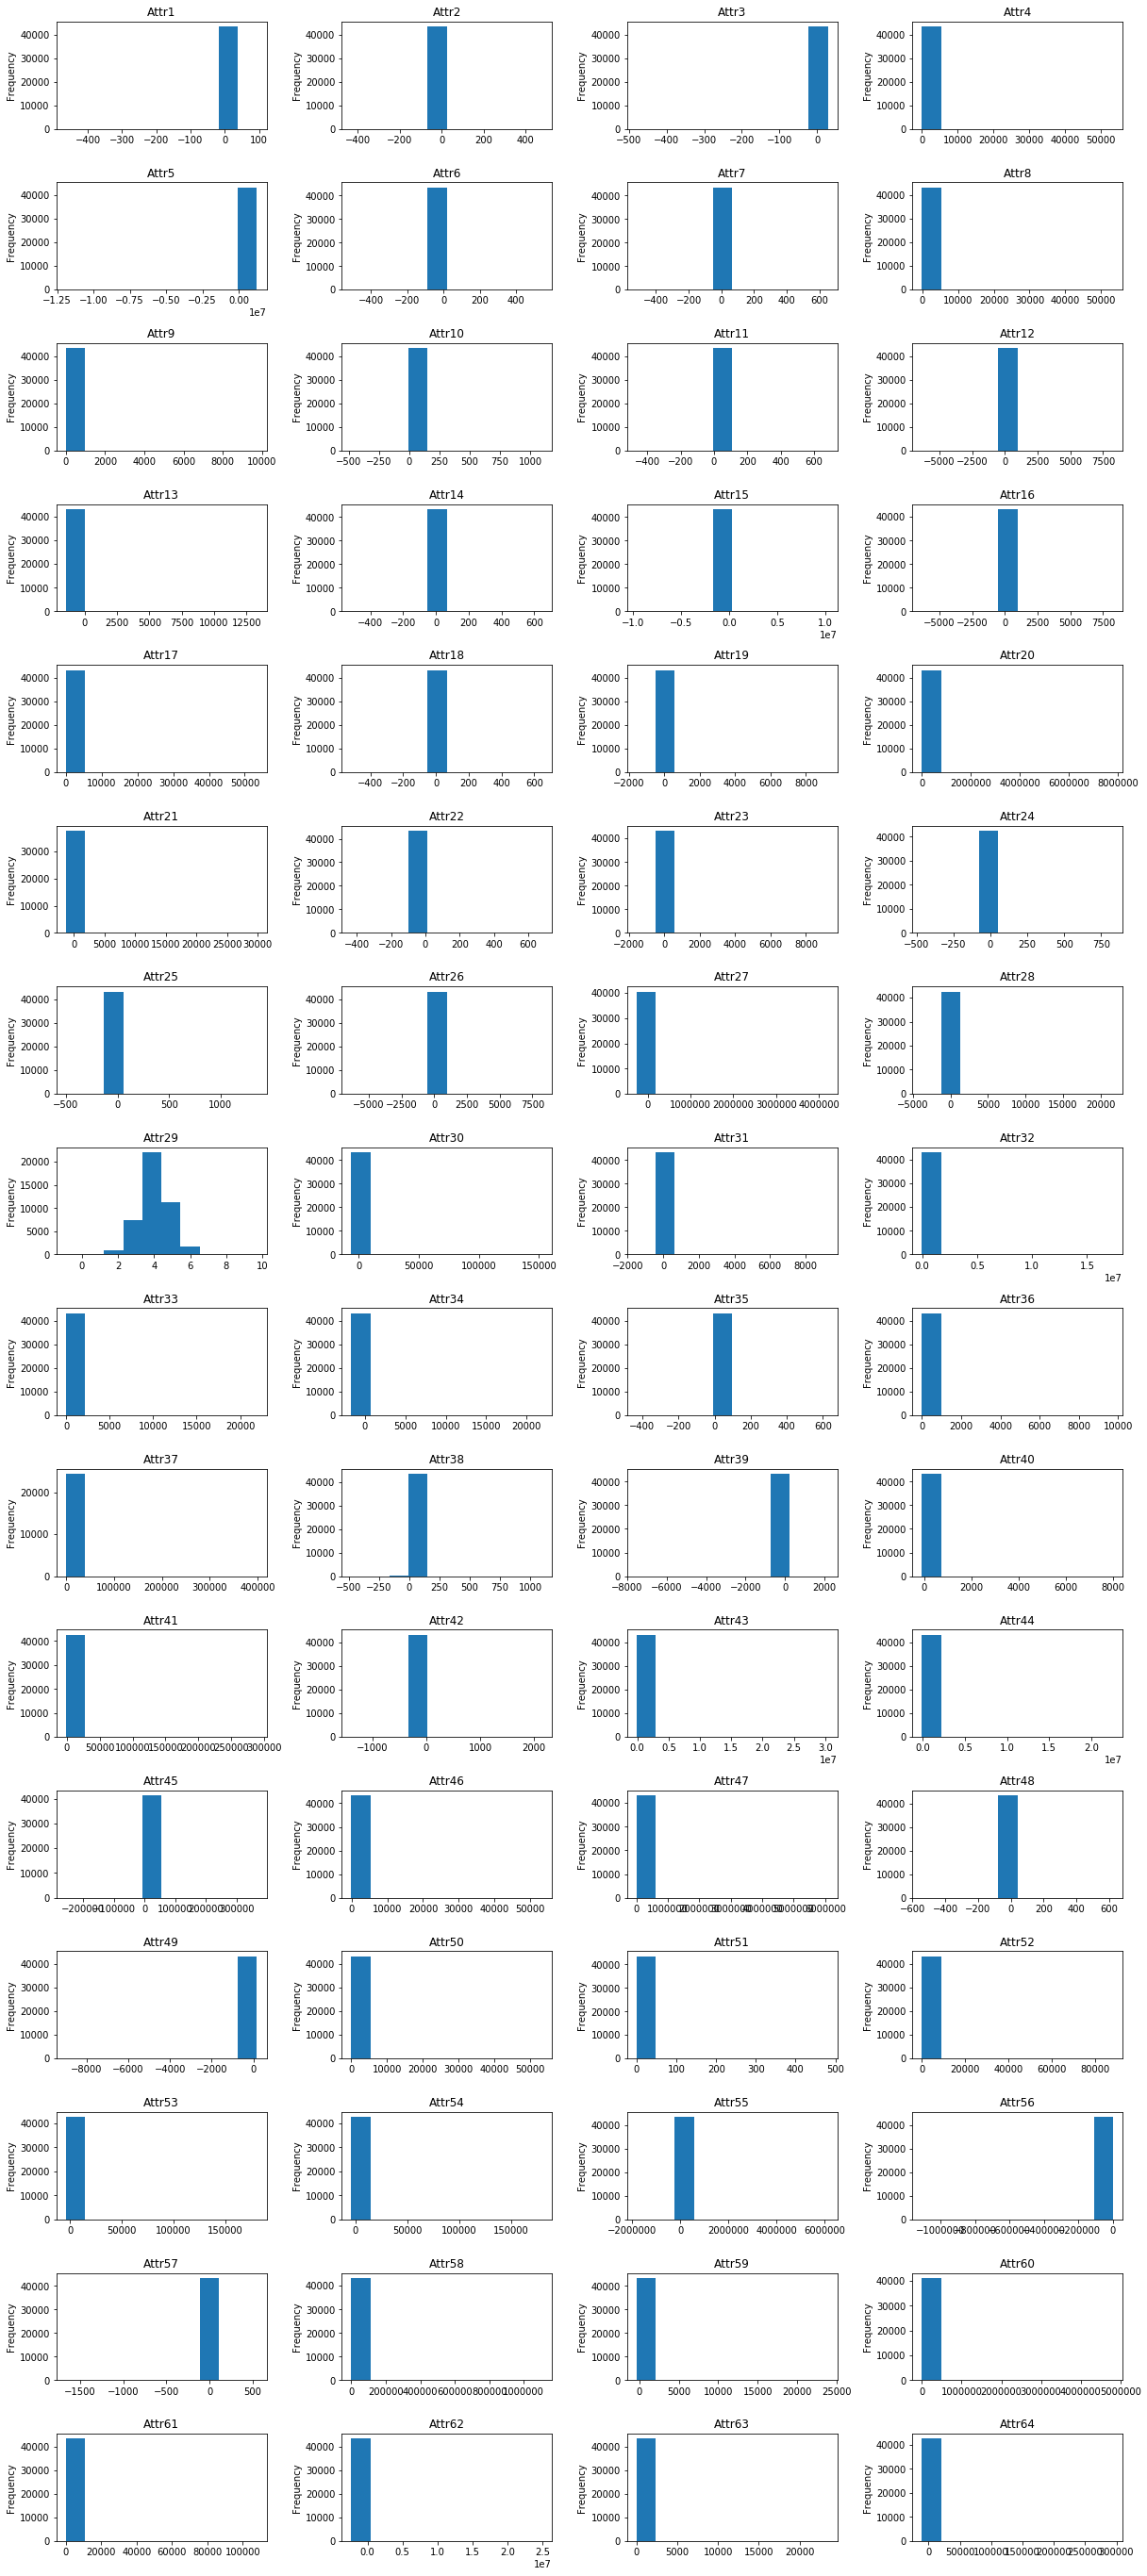

In [38]:
plt.figure(figsize = (17, 40))
for i, col in zip(range (1, len(df.columns)), column):
    plt.subplot(math.ceil(len(df.columns) / 4), 4, i)
    df[col].plot(kind = 'hist')
    plt.title(col)
    plt.tight_layout()

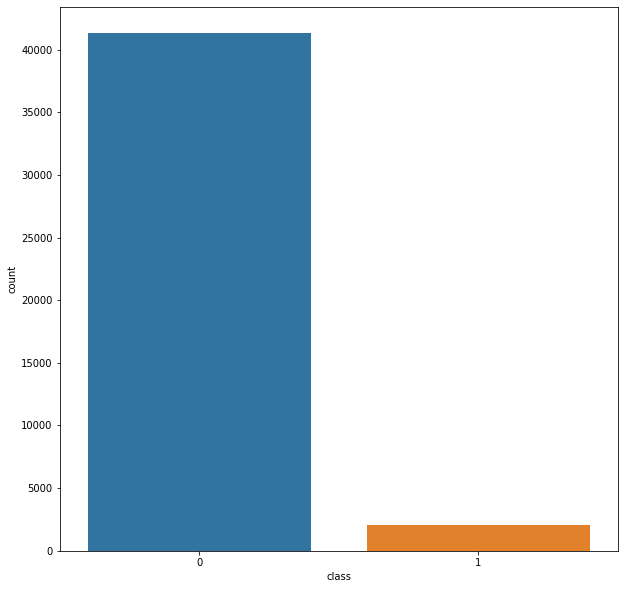

In [12]:
plt.figure(figsize = (10,10))
sns.countplot(df['class'])

In [22]:
df['class'].value_counts()

0    41314
1     2091
Name: class, dtype: int64

# EDA and Visualization

## Liquidity Visualized

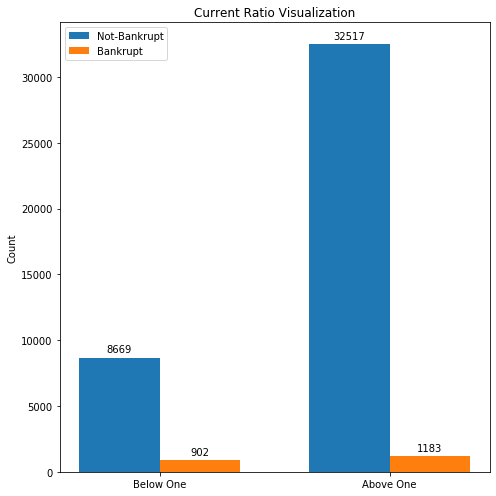

In [86]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr4'] < 1), sum(df[df['class'] == 0]['Attr4'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr4'] < 1), sum(df[df['class'] == 1]['Attr4'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Current Ratio Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

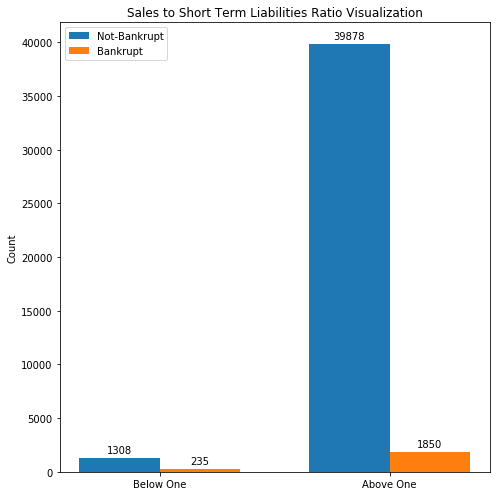

In [87]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr63'] < 1), sum(df[df['class'] == 0]['Attr63'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr63'] < 1), sum(df[df['class'] == 1]['Attr63'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Sales to Short Term Liabilities Ratio Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

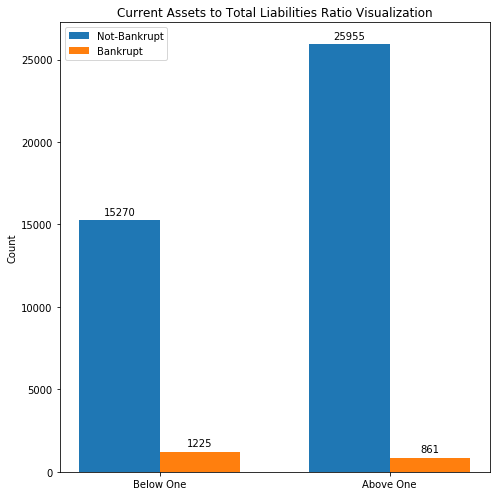

In [88]:
labels = ['Below One','Above One']
not_bankrupt = [len(df[(df['Attr50'] < 1) & (df['class'] == 0)]['Attr50']), len(df[(df['Attr50'] >= 1) & (df['class'] == 0)]['Attr50'])]
bankrupt = [sum(df[df['class'] == 1]['Attr50'] < 1), sum(df[df['class'] == 1]['Attr50'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Current Assets to Total Liabilities Ratio Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

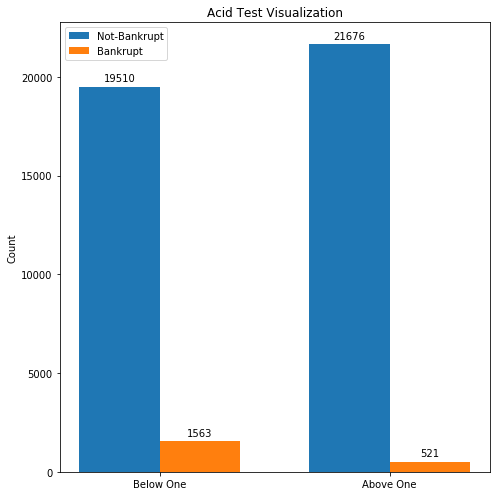

In [91]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr46'] < 1), sum(df[df['class'] == 0]['Attr46'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr46'] < 1), sum(df[df['class'] == 1]['Attr46'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Acid Test Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

## Solvency Visualized

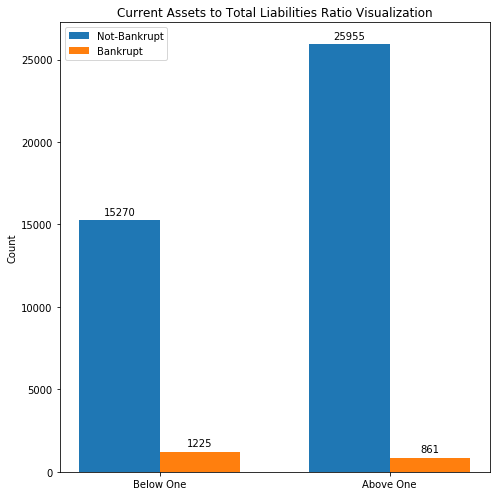

In [92]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr50'] < 1), sum(df[df['class'] == 0]['Attr50'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr50'] < 1), sum(df[df['class'] == 1]['Attr50'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Current Assets to Total Liabilities Ratio Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

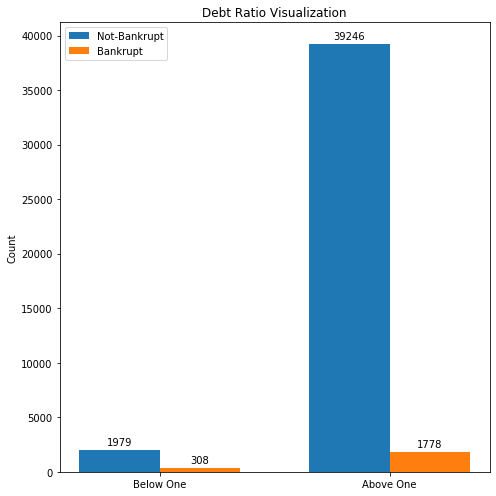

In [93]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr17'] < 1), sum(df[df['class'] == 0]['Attr17'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr17'] < 1), sum(df[df['class'] == 1]['Attr17'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Debt Ratio Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

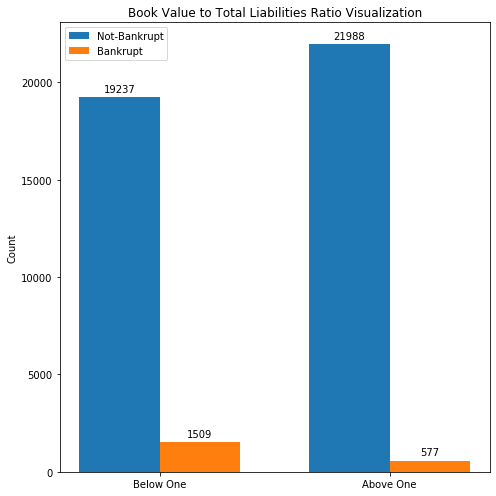

In [95]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr8'] < 1), sum(df[df['class'] == 0]['Attr8'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr8'] < 1), sum(df[df['class'] == 1]['Attr8'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Book Value to Total Liabilities Ratio Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

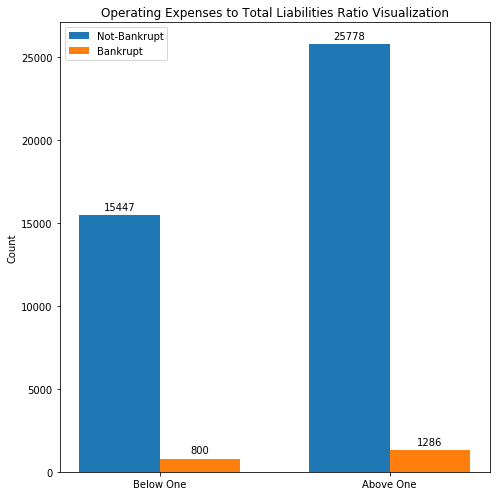

In [96]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr34'] < 1), sum(df[df['class'] == 0]['Attr34'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr34'] < 1), sum(df[df['class'] == 1]['Attr34'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Operating Expenses to Total Liabilities Ratio Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

## Profitability Visualized

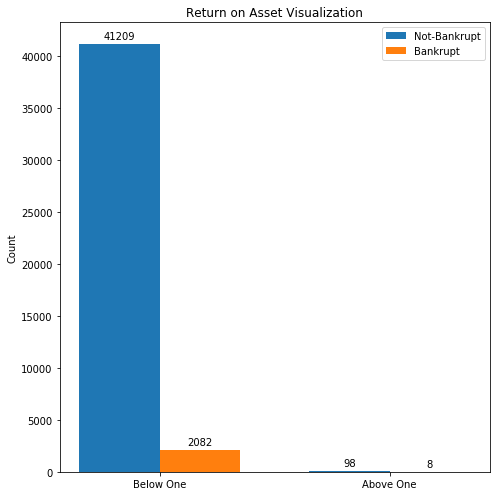

In [107]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr1'] < 1), sum(df[df['class'] == 0]['Attr1'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr1'] < 1), sum(df[df['class'] == 1]['Attr1'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Return on Asset Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

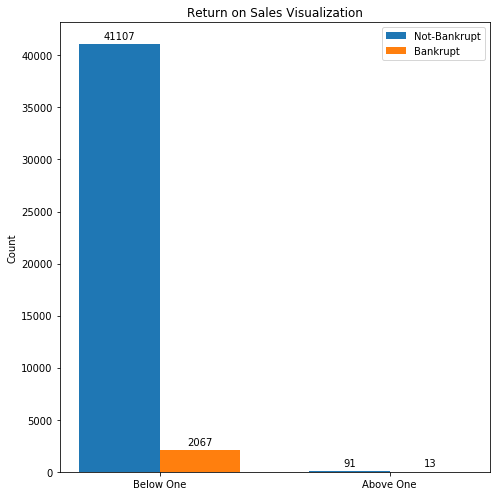

In [99]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr42'] < 1), sum(df[df['class'] == 0]['Attr42'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr42'] < 1), sum(df[df['class'] == 1]['Attr42'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Return on Sales Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

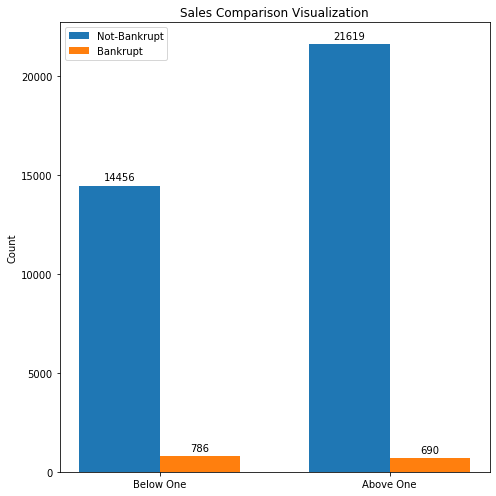

In [103]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr21'] < 1), sum(df[df['class'] == 0]['Attr21'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr21'] < 1), sum(df[df['class'] == 1]['Attr21'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Sales Comparison Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

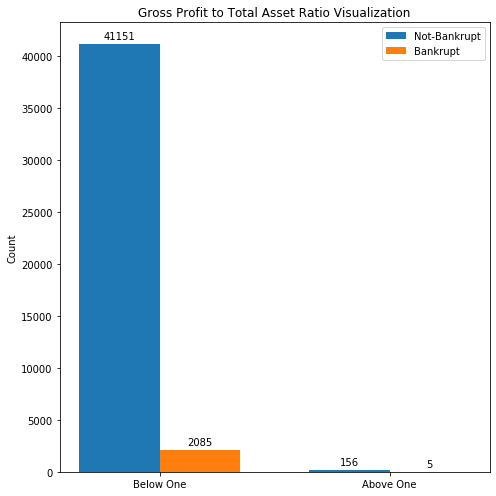

In [108]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr35'] < 1), sum(df[df['class'] == 0]['Attr35'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr35'] < 1), sum(df[df['class'] == 1]['Attr35'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Gross Profit to Total Asset Ratio Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

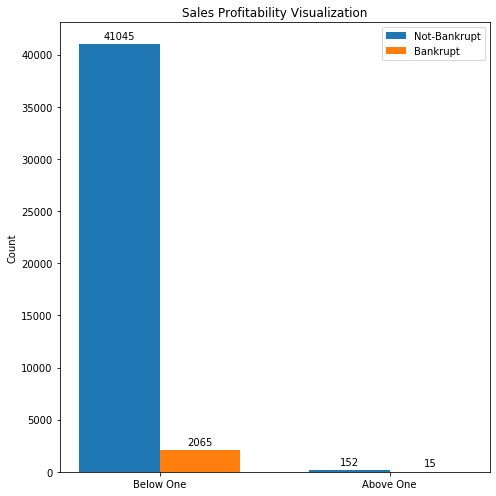

In [109]:
labels = ['Below One','Above One']
not_bankrupt = [sum(df[df['class'] == 0]['Attr19'] < 1), sum(df[df['class'] == 0]['Attr19'] >= 1)]
bankrupt = [sum(df[df['class'] == 1]['Attr19'] < 1), sum(df[df['class'] == 1]['Attr19'] >= 1)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (7,7))
rects1 = ax.bar(x - width/2, not_bankrupt, width, label = 'Not-Bankrupt')
rects2 = ax.bar(x + width/2, bankrupt, width, label = 'Bankrupt')

ax.set_ylabel('Count')
ax.set_title('Sales Profitability Visualization')
ax.set_xticks(x)
ax.set_xticklabels(labels)
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
ax.legend()

From graphs and visualization above, we can conclude that liquidity and solvency is not the main problem, but Profitability does. My assumption is, companies filed bankruptcy because they couldn't afford to operate because they couldn't create profit. Their sales may be high, but if they couldn't generate profit from it, they couldn't survive for a long time.

# Data Cleaning

In [11]:
import missingno as msno

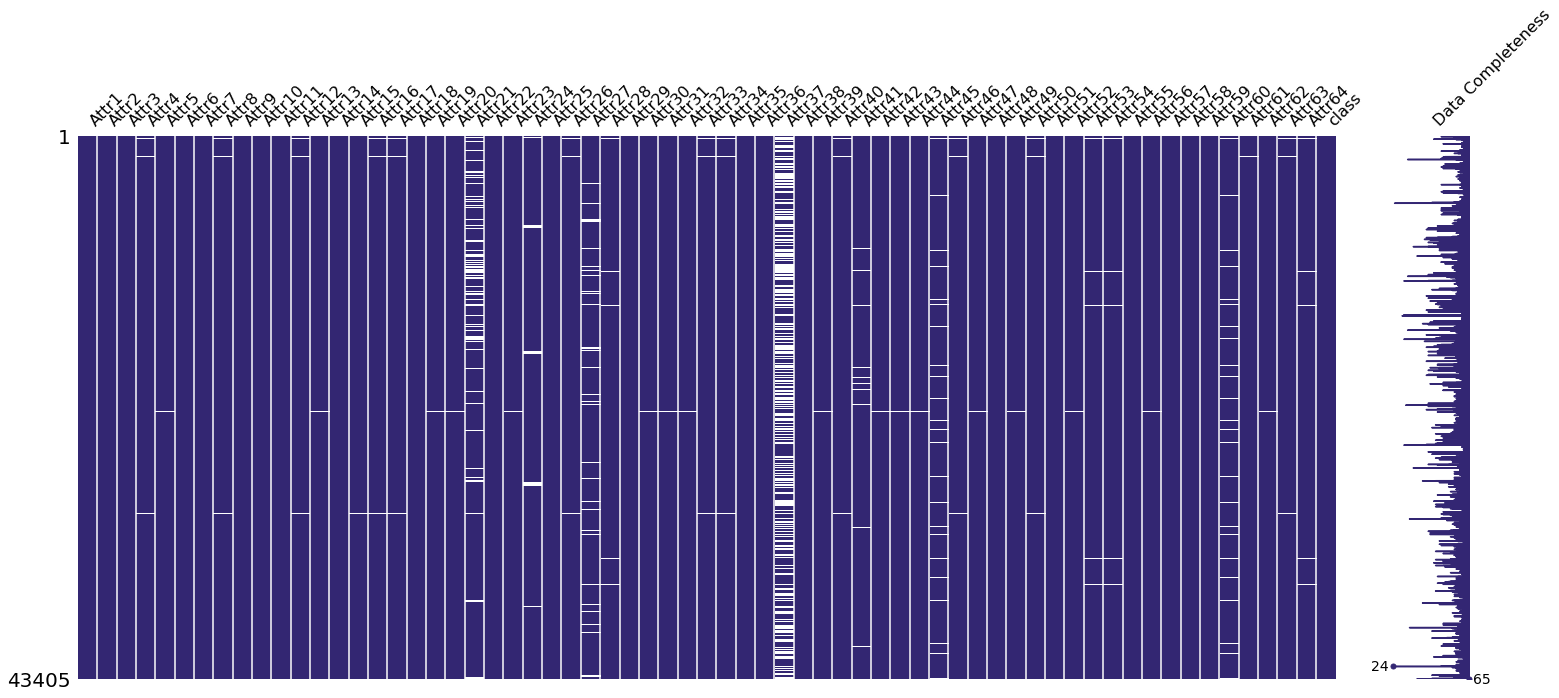

In [12]:
msno.matrix(df, labels = True, color=(0.20,0.15,0.45))

In [13]:
df.isna().sum().sum()

41322

As we see, there are too many missing values. The majority comes from Attr37, which is current assets to long term liabilities ratio. I suspect this event occurs because the denominator is long term debt. If the company doesn't have long term debt, the denominator equals to zero, which means there are no result, hence the majority values is null. Now, i'm trying to findout explanation about other null values. First, I will split the data into bankrupt and not bankrupt.

In [14]:
df[df['Attr4'].isna() & 
   df['Attr8'].isna() & 
   df['Attr12'].isna() & 
   df['Attr16'].isna() & 
   df['Attr17'].isna() & 
   df['Attr26'].isna() &
   df['Attr33'].isna() &
   df['Attr34'].isna() &
   df['Attr40'].isna() &
   df['Attr46'].isna() &
   df['Attr50'].isna() &
   df['Attr63'].isna()
  ]

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
75,-34.754000,0.0,0.00000,NaN,0.000,0.37417,9.529300,NaN,194.18000,58.725,...,0.036768,-0.591810,0.95169,0.023662,3.3489,NaN,0.0,NaN,14043.0000,0
279,0.035972,0.0,1.00000,NaN,1560.200,-0.31137,0.035972,NaN,0.27564,1.000,...,-2.627900,0.035972,3.62790,0.000000,NaN,0.086325,0.0,NaN,NaN,0
644,0.000000,0.0,0.00000,NaN,0.000,303.67000,186.430000,NaN,1083.20000,741.500,...,0.456490,0.000000,0.54832,0.000000,2.3017,NaN,0.0,NaN,23183.0000,0
1232,0.000000,0.0,0.00000,NaN,0.000,0.00000,19.340000,NaN,440.13000,269.420,...,0.313040,0.000000,0.70576,0.000000,3.1553,NaN,0.0,NaN,294770.0000,0
1677,0.000000,0.0,0.00000,NaN,0.000,0.00000,203.450000,NaN,1156.40000,375.200,...,0.179050,0.000000,0.82515,0.002072,3.1175,NaN,0.0,NaN,44785.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42347,0.143940,0.0,0.41299,NaN,63.962,0.30062,0.143940,NaN,1.06860,0.000,...,0.064178,NaN,0.93582,NaN,22.6670,9.014000,0.0,NaN,3.3814,0
42379,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,0.004731,NaN,1.02200,NaN,NaN,NaN,0.0,NaN,NaN,0
43078,0.798300,0.0,1.00000,NaN,126.540,-1.05810,0.901440,NaN,3.74590,1.000,...,0.240590,0.798300,0.75938,0.000000,NaN,16.288000,0.0,NaN,NaN,1
43145,-463.890000,0.0,0.00000,NaN,0.000,-463.89000,-463.890000,NaN,0.87160,266.860,...,-0.147320,-1.738400,1.14730,0.000000,6.9498,NaN,0.0,NaN,28999.0000,1


In [15]:
df[df['Attr4'].isna() & 
   df['Attr8'].isna() & 
   df['Attr12'].isna() & 
   df['Attr16'].isna() & 
   df['Attr17'].isna() & 
   df['Attr26'].isna() &
   df['Attr33'].isna() &
   df['Attr34'].isna() &
   df['Attr40'].isna() &
   df['Attr46'].isna() &
   df['Attr50'].isna() &
   df['Attr63'].isna() &
   df['class'] == 1
  ]

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
16854,-3.477100,0.0,0.0,NaN,0.000,35.551000,-3.48650,NaN,109.5000,74.43400,...,-0.013713,-0.046714,1.00550,0.003426,4.8030,NaN,0.0,NaN,127680.0,1
27563,0.041431,0.0,0.0,NaN,0.000,0.041431,0.00000,NaN,NaN,0.41361,...,1.000000,0.100170,0.00000,0.000000,NaN,NaN,0.0,NaN,NaN,1
43078,0.798300,0.0,1.0,NaN,126.540,-1.058100,0.90144,NaN,3.7459,1.00000,...,0.240590,0.798300,0.75938,0.000000,NaN,16.288,0.0,NaN,NaN,1
43145,-463.890000,0.0,0.0,NaN,0.000,-463.890000,-463.89000,NaN,0.8716,266.86000,...,-0.147320,-1.738400,1.14730,0.000000,6.9498,NaN,0.0,NaN,28999.0,1
43339,5.530000,0.0,1.0,NaN,24.725,-4.532000,5.53000,NaN,-3.4960,1.00000,...,1.651000,5.530000,0.69505,0.000000,NaN,NaN,0.0,NaN,NaN,1


After searching for patterns, I find out some clues. There are instances that don't have debt. in visualization above, we get the pattern of null values on features that requires debt as denominator. The features explain about ability to pay debt (short term and total debt). I assume, those instances don't have any liabilities or debt. So, it's logic if those features are null.

In [16]:
drop_columns = ['Attr4','Attr8','Attr12','Attr16','Attr17','Attr26','Attr33','Attr34','Attr40','Attr46','Attr50','Attr63']

In [17]:
df2 = df.drop(drop_columns, axis = 1)
df2

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr7,Attr9,Attr10,Attr11,Attr13,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64,class
0,0.200550,0.37951,0.396410,32.3510,0.38825,0.249760,1.13890,0.504940,0.249760,0.166600,...,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,7.42770,0
1,0.209120,0.49988,0.472250,14.7860,0.00000,0.258340,1.69960,0.497880,0.261140,0.158350,...,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,60.98700,0
2,0.248660,0.69592,0.267130,-1.1523,0.00000,0.309060,1.30900,0.304080,0.312580,0.244350,...,6332.70,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,5.20780,0
3,0.081483,0.30734,0.458790,51.9520,0.14988,0.092704,1.05710,0.573530,0.092704,0.094257,...,20545.00,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,5.54970,0
4,0.187320,0.61323,0.229600,-7.3128,0.18732,0.187320,1.15590,0.386770,0.187320,0.121820,...,3186.60,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,-18.9070,0.00000,0.013981,1.67680,0.293790,0.041583,0.023622,...,3599.10,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,2.27990,1
43401,-0.578050,0.96702,-0.800850,-67.3650,-0.57805,-0.578050,0.93979,-0.390040,-0.578050,-0.110220,...,-9242.10,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,5.13050,1
43402,-0.179050,1.25530,-0.275990,-120.4400,-0.17905,-0.154930,1.17490,-0.326590,-0.154930,-0.072940,...,-58253.00,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,9.95270,1
43403,-0.108860,0.74394,0.015449,-17.0030,-0.10886,-0.109180,0.84516,0.093224,-0.109180,-0.065652,...,1107.50,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,0.95575,1


In [18]:
df2[
    df2['Attr28'].isna() &
    df2['Attr53'].isna() &
    df2['Attr54']. isna()
]

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr7,Attr9,Attr10,Attr11,Attr13,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64,class
279,0.035972,0.000000,1.00000,1560.200,-0.31137,0.035972,0.27564,1.00000,0.035972,1.923800,...,708.600,-2.627900,0.035972,3.62790,0.000000,NaN,0.086325,0.0000,NaN,0
307,0.033612,0.806860,0.19368,-25.141,-0.33479,0.045626,1.04840,0.12242,0.045626,0.024051,...,10447.000,0.046204,0.274570,0.95380,0.004392,7.7590,12.014000,95.6410,NaN,0
1179,1.310600,0.079467,0.92053,101.120,2.36720,1.310600,4.18230,0.92053,1.311100,0.316890,...,1715.400,0.307270,1.423700,0.68858,0.000000,38.6400,7.524900,6.9352,NaN,0
1850,0.025242,0.874500,0.12749,-30.772,0.00000,0.031107,2.72970,0.12550,0.031107,0.011396,...,740.210,0.007467,0.201130,0.98870,0.000000,7.6022,4.699600,116.6700,NaN,0
2202,0.002813,0.157900,0.68304,183.710,-0.14613,0.007652,1.07390,0.84210,0.020647,0.021510,...,3146.400,-0.027201,0.003341,0.99320,0.000000,8.4601,3.630900,34.1250,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43319,-1.291000,0.127560,0.87244,114.920,-2.69400,-1.291000,1.19740,0.87244,-1.290900,-1.078100,...,9.445,-0.973310,-1.479700,2.07900,0.000000,NaN,1.923300,38.8850,NaN,1
43339,5.530000,0.000000,1.00000,24.725,-4.53200,5.530000,-3.49600,1.00000,6.388000,-1.581800,...,5.000,1.651000,5.530000,0.69505,0.000000,NaN,NaN,0.0000,NaN,1
43375,NaN,NaN,NaN,-1076400.000,NaN,NaN,7.25330,NaN,NaN,0.114890,...,-2990.000,0.439610,NaN,0.13787,NaN,4.8356,NaN,25077.0000,NaN,1
43380,-2.409900,5.536900,-4.53690,-239.520,-3.72270,-2.409900,5.56310,-4.53690,-2.214500,-0.427230,...,-284.330,-0.328990,0.531180,1.38560,0.000000,7.6222,21.337000,363.2800,NaN,1


In [19]:
df2[
    df2['Attr28'].isna() &
    df2['Attr53'].isna() &
    df2['Attr54'].isna() &
    df2['class'] == 1
]

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr7,Attr9,Attr10,Attr11,Attr13,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64,class
6769,0.044743,0.81616,0.33607,-89.361,-0.018694,0.118550,2.4645,0.18384,0.228600,0.048104,...,239.460,0.039863,0.24338,0.91170,0.00000,NaN,83.0650,98.330,NaN,1
6844,0.199220,0.55182,0.44818,49.559,0.199220,0.298270,1.0923,0.44818,0.298270,0.084426,...,510.070,0.084528,0.44452,0.91547,0.00000,1207.5000,3.7372,57.009,NaN,1
6921,-61.602000,441.50000,-440.50000,-163090.000,-397.890000,-61.602000,1.2999,-440.55000,0.341080,-47.390000,...,-4171.500,0.647440,0.13983,0.74095,0.00000,15.0120,1.7561,123970.000,NaN,1
6922,0.124710,0.74486,0.34091,-93.842,0.000000,0.149380,1.2260,0.25503,0.221560,0.122120,...,2985.000,0.079180,0.48903,0.83631,0.33632,1.9290,3.4396,196.220,NaN,1
6950,0.005074,0.36178,0.63822,328.720,0.005074,0.005074,1.0410,0.63822,0.005074,0.006973,...,457.850,0.039408,0.00795,0.96059,0.00000,NaN,1.6321,181.490,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43319,-1.291000,0.12756,0.87244,114.920,-2.694000,-1.291000,1.1974,0.87244,-1.290900,-1.078100,...,9.445,-0.973310,-1.47970,2.07900,0.00000,NaN,1.9233,38.885,NaN,1
43339,5.530000,0.00000,1.00000,24.725,-4.532000,5.530000,-3.4960,1.00000,6.388000,-1.581800,...,5.000,1.651000,5.53000,0.69505,0.00000,NaN,NaN,0.000,NaN,1
43375,NaN,NaN,NaN,-1076400.000,NaN,NaN,7.2533,NaN,NaN,0.114890,...,-2990.000,0.439610,NaN,0.13787,NaN,4.8356,NaN,25077.000,NaN,1
43380,-2.409900,5.53690,-4.53690,-239.520,-3.722700,-2.409900,5.5631,-4.53690,-2.214500,-0.427230,...,-284.330,-0.328990,0.53118,1.38560,0.00000,7.6222,21.3370,363.280,NaN,1


Visualization above tells about instances that have null value on attr 28, 53, and 54. Those features requires fixed assets as denominator. My guessing is, instances that have null value in this features means they don't have any fixed assets, which is unusual.

In [20]:
drop_cols = ['Attr28','Attr53','Attr54']
df3 = df2.drop(drop_cols, axis = 1)
df3

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr7,Attr9,Attr10,Attr11,Attr13,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64,class
0,0.200550,0.37951,0.396410,32.3510,0.38825,0.249760,1.13890,0.504940,0.249760,0.166600,...,348690.00,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,7.42770,0
1,0.209120,0.49988,0.472250,14.7860,0.00000,0.258340,1.69960,0.497880,0.261140,0.158350,...,2304.60,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,60.98700,0
2,0.248660,0.69592,0.267130,-1.1523,0.00000,0.309060,1.30900,0.304080,0.312580,0.244350,...,6332.70,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,5.20780,0
3,0.081483,0.30734,0.458790,51.9520,0.14988,0.092704,1.05710,0.573530,0.092704,0.094257,...,20545.00,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,5.54970,0
4,0.187320,0.61323,0.229600,-7.3128,0.18732,0.187320,1.15590,0.386770,0.187320,0.121820,...,3186.60,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,-18.9070,0.00000,0.013981,1.67680,0.293790,0.041583,0.023622,...,3599.10,0.020169,0.043904,1.01220,1.259400,13.4720,12.4320,49.117,2.27990,1
43401,-0.578050,0.96702,-0.800850,-67.3650,-0.57805,-0.578050,0.93979,-0.390040,-0.578050,-0.110220,...,-9242.10,-0.064073,1.482000,1.06410,-0.018084,110.7200,44.7590,81.220,5.13050,1
43402,-0.179050,1.25530,-0.275990,-120.4400,-0.17905,-0.154930,1.17490,-0.326590,-0.154930,-0.072940,...,-58253.00,0.148880,0.548240,0.85112,-0.522430,9.8526,3.4892,207.870,9.95270,1
43403,-0.108860,0.74394,0.015449,-17.0030,-0.10886,-0.109180,0.84516,0.093224,-0.109180,-0.065652,...,1107.50,-0.183200,-1.167700,1.18320,6.092400,13.8860,6.0769,83.122,0.95575,1


In [21]:
# msno.matrix(df3, labels = True, color=(0.20,0.15,0.45))

In [22]:
df3[
    df3['Attr13'].isna() &
    df3['Attr19'].isna() &
    df3['Attr20'].isna() &
    df3['Attr23'].isna() &
    df3['Attr30'].isna() &
    df3['Attr31'].isna() &
    df3['Attr39'].isna() &
    df3['Attr42'].isna() &
    df3['Attr43'].isna() &
    df3['Attr44'].isna() &
    df3['Attr49'].isna() &
    df3['Attr56'].isna() &
    df3['Attr62'].isna()
]

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr7,Attr9,Attr10,Attr11,Attr13,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64,class
7207,-0.825200,1.847700,0.922290,220.990,-0.163350,-0.825200,0.0,-0.84773,-0.529880,NaN,...,327.480,NaN,0.973420,1.84790,-1.795100,NaN,0.0,NaN,0.0,0
7361,-4.631900,0.238380,0.761620,59.192,-0.099913,-4.631900,0.0,0.76162,-4.631700,NaN,...,22.876,NaN,-6.081600,15459.00000,0.000000,NaN,0.0,NaN,NaN,0
7416,0.045191,0.000054,0.999300,12393.000,0.060255,0.045191,0.0,0.99995,0.045191,NaN,...,741.660,NaN,0.045194,NaN,0.000054,NaN,0.0,NaN,0.0,0
7487,-1.073400,1.174000,-0.173980,-193.150,0.000000,-1.073400,0.0,-0.17396,-1.073400,NaN,...,-9.672,NaN,6.170100,59672.00000,0.000000,NaN,0.0,NaN,NaN,0
7489,-0.071275,0.105200,0.012489,NaN,0.000000,-0.071275,0.0,0.89480,-0.071124,NaN,...,4.473,NaN,-0.079654,NaN,0.000000,NaN,0.0,NaN,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35733,-0.154180,0.001647,0.165690,1628.300,0.408540,-0.154180,0.0,0.99835,-0.154180,NaN,...,164.990,NaN,-0.154430,NaN,0.000000,NaN,0.0,NaN,0.0,0
36355,0.005714,0.000143,0.022730,629.030,0.070565,0.009439,0.0,0.99458,0.009439,NaN,...,38.070,NaN,0.005745,NaN,0.000000,NaN,0.0,NaN,0.0,0
37309,-0.233020,3.501900,1.000000,8197.100,-2.891100,-0.233020,0.0,-2.50190,-0.040521,NaN,...,123.640,NaN,0.093137,12.62800,-1.395900,NaN,0.0,NaN,NaN,1
37321,0.045462,0.249430,0.044852,2491.500,0.045462,0.045760,0.0,0.75030,0.045760,NaN,...,26986.000,NaN,0.060592,NaN,0.000000,0.0,0.0,NaN,0.0,1


In [23]:
df3[
    df3['Attr13'].isna() &
    df3['Attr19'].isna() &
    df3['Attr20'].isna() &
    df3['Attr23'].isna() &
    df3['Attr30'].isna() &
    df3['Attr31'].isna() &
    df3['Attr39'].isna() &
    df3['Attr42'].isna() &
    df3['Attr43'].isna() &
    df3['Attr44'].isna() &
    df3['Attr49'].isna() &
    df3['Attr56'].isna() &
    df3['Attr62'].isna() &
    df3['class'] == 1
]

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr7,Attr9,Attr10,Attr11,Attr13,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64,class
16818,-5.146900,0.849040,0.150960,-9.8811,-45.766000,-5.146900,0.0,0.15096,-1.070900,NaN,...,1.49,NaN,-34.094000,30.36100,0.000000,0.0,0.0,NaN,NaN,1
16894,-0.136640,0.007621,0.992380,2614.7000,-2.183500,-0.136640,0.0,0.99292,-0.136640,NaN,...,18.23,NaN,-0.137610,NaN,0.000000,NaN,0.0,NaN,NaN,1
17026,-0.009036,0.516810,0.221360,-12979.0000,-0.009036,-0.009040,0.0,0.12568,-0.009040,NaN,...,19377.00,NaN,-0.071901,NaN,0.746960,0.0,0.0,NaN,0.0,1
17075,0.043851,0.000359,0.043424,1809.4000,0.043851,0.038549,0.0,0.99945,0.038549,NaN,...,26456.00,NaN,0.043875,NaN,0.000011,0.0,0.0,NaN,0.0,1
17190,0.012740,0.001005,0.067221,2543.1000,0.012740,0.012740,0.0,0.99883,0.012740,NaN,...,2077.70,NaN,0.012755,NaN,0.000000,0.0,0.0,NaN,0.0,1
27549,0.286690,0.005257,0.052149,1885.5000,0.286690,0.343890,0.0,0.99442,0.343890,NaN,...,23505.00,NaN,0.288290,NaN,0.000010,NaN,0.0,NaN,0.0,1
27585,0.135170,10.455000,-10.177000,-4111.3000,-13.603000,0.135170,0.0,-9.45480,0.440520,NaN,...,-633.94,NaN,-0.014297,0.66920,0.000000,NaN,0.0,NaN,0.0,1
27692,0.004696,0.196280,-0.125790,-3075.5000,0.004696,0.004696,0.0,0.80361,0.004696,NaN,...,-5622.20,NaN,0.005844,NaN,0.000348,0.0,0.0,NaN,0.0,1
37309,-0.233020,3.501900,1.000000,8197.1000,-2.891100,-0.233020,0.0,-2.50190,-0.040521,NaN,...,123.64,NaN,0.093137,12.62800,-1.395900,NaN,0.0,NaN,NaN,1
37321,0.045462,0.249430,0.044852,2491.5000,0.045462,0.045760,0.0,0.75030,0.045760,NaN,...,26986.00,NaN,0.060592,NaN,0.000000,0.0,0.0,NaN,0.0,1


In [24]:
df3[
    df3['Attr13'].isna() &
    df3['Attr19'].isna() &
    df3['Attr20'].isna() &
    df3['Attr23'].isna() &
    df3['Attr30'].isna() &
    df3['Attr31'].isna() &
    df3['Attr32'].isna() &
    df3['Attr39'].isna() &
    df3['Attr42'].isna() &
    df3['Attr43'].isna() &
    df3['Attr44'].isna() &
    df3['Attr47'].isna() &
    df3['Attr49'].isna() &
    df3['Attr52'].isna() &
    df3['Attr56'].isna() &
    df3['Attr62'].isna()
]

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr7,Attr9,Attr10,Attr11,Attr13,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64,class
7489,-0.071275,0.105200,0.012489,NaN,0.000000,-0.071275,0.0,0.89480,-0.071124,NaN,...,4.47300,NaN,-0.079654,NaN,0.000000,NaN,0.0,NaN,0.0,0
11596,0.000000,0.000000,0.754040,NaN,0.298020,0.000000,NaN,0.80721,0.000000,NaN,...,10699.00000,NaN,0.000000,NaN,0.000000,0.0,0.0,NaN,0.0,0
13201,-0.401710,0.327230,0.450490,NaN,-0.516300,-0.401710,0.0,0.67277,-0.401020,NaN,...,31.84500,NaN,-0.597100,2.02170,0.000000,NaN,0.0,NaN,0.0,0
15006,0.000000,0.096063,0.587400,NaN,-0.061417,0.000000,0.0,0.90394,0.000000,NaN,...,373.00000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,0.0,0
16255,0.000000,0.000000,0.402130,NaN,0.000000,0.000000,0.0,0.46381,0.000000,NaN,...,NaN,NaN,0.000000,NaN,0.000000,0.0,0.0,NaN,0.0,0
17236,0.000000,0.611480,0.054130,NaN,0.097809,0.000000,NaN,0.36086,0.000000,NaN,...,9524.60000,NaN,0.000000,NaN,0.008828,0.0,0.0,NaN,0.0,0
18012,0.000000,0.737260,0.225800,NaN,0.000000,0.000000,NaN,0.24865,0.000000,NaN,...,12385.00000,NaN,0.000000,NaN,0.166090,0.0,0.0,NaN,0.0,0
19131,-1.903200,0.419350,0.548390,NaN,-3.451600,-1.967700,0.0,0.58065,-1.967700,NaN,...,2.30770,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,0.0,0
22061,-0.296050,1.903300,-0.542640,NaN,-0.709920,-0.127430,0.0,-0.90327,-0.000788,NaN,...,-914.15000,NaN,0.327750,26.41600,-0.723030,0.0,0.0,NaN,0.0,0
29499,-0.004334,0.562210,-0.018071,84531.0,-0.005906,-0.004510,0.0,0.43779,-0.004055,NaN,...,0.87135,NaN,0.000000,0.17714,0.963320,0.0,0.0,NaN,0.0,0


Next one is visualization for instances that don't generate sales at the fiscal year reported. There are 127 instances that aren't have any sales at the fiscal period and 11 of them get bankrupt. From 127 companies that don't generate sales, 10 of them are Service companies (because they don't have cost of products sold)

In [25]:
drop_col = ['Attr13',
    'Attr19',
    'Attr20',
    'Attr23',
    'Attr30',
    'Attr31',
    'Attr32',
    'Attr39',
    'Attr42',
    'Attr43',
    'Attr44',
    'Attr47',
    'Attr49',
    'Attr52',
    'Attr56',
    'Attr62']
df4 = df3.drop(drop_col, axis = 1)
df4

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr7,Attr9,Attr10,Attr11,Attr14,...,Attr48,Attr51,Attr55,Attr57,Attr58,Attr59,Attr60,Attr61,Attr64,class
0,0.200550,0.37951,0.396410,32.3510,0.38825,0.249760,1.13890,0.504940,0.249760,0.249760,...,0.185300,0.37854,348690.00,0.397180,0.87804,0.001924,8.4160,5.1372,7.42770,0
1,0.209120,0.49988,0.472250,14.7860,0.00000,0.258340,1.69960,0.497880,0.261140,0.258340,...,0.237270,0.49988,2304.60,0.420020,0.85300,0.000000,4.1486,3.2732,60.98700,0
2,0.248660,0.69592,0.267130,-1.1523,0.00000,0.309060,1.30900,0.304080,0.312580,0.309060,...,0.291810,0.48152,6332.70,0.817740,0.76599,0.694840,4.9909,3.9510,5.20780,0
3,0.081483,0.30734,0.458790,51.9520,0.14988,0.092704,1.05710,0.573530,0.092704,0.092704,...,0.085874,0.30734,20545.00,0.142070,0.94598,0.000000,4.5746,3.6147,5.54970,0
4,0.187320,0.61323,0.229600,-7.3128,0.18732,0.187320,1.15590,0.386770,0.187320,0.187320,...,0.188110,0.56511,3186.60,0.484310,0.86515,0.124440,6.3985,4.3158,7.89800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43400,0.012898,0.70621,0.038857,-18.9070,0.00000,0.013981,1.67680,0.293790,0.041583,0.013981,...,0.014771,0.22564,3599.10,0.043904,1.01220,1.259400,13.4720,12.4320,2.27990,1
43401,-0.578050,0.96702,-0.800850,-67.3650,-0.57805,-0.578050,0.93979,-0.390040,-0.578050,-0.578050,...,-0.637460,0.95997,-9242.10,1.482000,1.06410,-0.018084,110.7200,44.7590,5.13050,1
43402,-0.179050,1.25530,-0.275990,-120.4400,-0.17905,-0.154930,1.17490,-0.326590,-0.154930,-0.154930,...,0.160680,1.08460,-58253.00,0.548240,0.85112,-0.522430,9.8526,3.4892,9.95270,1
43403,-0.108860,0.74394,0.015449,-17.0030,-0.10886,-0.109180,0.84516,0.093224,-0.109180,-0.109180,...,-0.158400,0.17599,1107.50,-1.167700,1.18320,6.092400,13.8860,6.0769,0.95575,1


In [26]:
# msno.matrix(df4, labels = True, color=(0.20,0.15,0.45))

In [27]:
df4[df4['Attr45'].isna() & df4['Attr60'].isna()]

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr7,Attr9,Attr10,Attr11,Attr14,...,Attr48,Attr51,Attr55,Attr57,Attr58,Attr59,Attr60,Attr61,Attr64,class
40,0.011834,0.088476,0.025515,91.7980,-0.195220,0.011834,1.09940,0.911520,0.011834,0.011834,...,-0.024306,0.088476,75.55,0.012982,0.90961,0.0000,NaN,3.296900,0.15227,0
165,0.457320,0.353970,0.288590,52.3960,0.000000,0.579150,2.54040,0.646030,0.580580,0.579150,...,0.574490,0.336110,576.53,0.707900,0.77307,0.0000,NaN,5.953600,6.76910,0
177,-0.004889,0.798710,0.949840,114.5600,-0.025845,0.010138,1.01360,0.081640,0.010138,0.010138,...,0.041107,0.000000,41586.00,-0.059879,0.98661,9.7833,NaN,3.196900,60.40100,0
246,0.309930,1.071400,0.258420,26.2710,0.109890,0.343100,0.91754,-0.132050,0.343100,0.343100,...,0.168030,0.459770,2960.10,-2.347100,1.08990,-4.6317,NaN,4.237100,9.97950,0
279,0.035972,0.000000,1.000000,1560.2000,-0.311370,0.035972,0.27564,1.000000,0.035972,0.035972,...,-0.030116,0.000000,708.60,0.035972,3.62790,0.0000,NaN,0.086325,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43339,5.530000,0.000000,1.000000,24.7250,-4.532000,5.530000,-3.49600,1.000000,6.388000,5.530000,...,6.390000,0.000000,5.00,5.530000,0.69505,0.0000,NaN,NaN,NaN,1
43360,-0.226190,1.209900,-1.166200,-2957.9000,0.000000,-0.226190,0.14210,-0.209930,-0.152900,-0.226190,...,-0.305900,1.209900,-358.49,1.077500,2.07580,0.0000,NaN,8.195100,0.14859,1
43365,-0.070858,1.060700,-0.079431,-3.0349,0.000000,-0.070960,9.39490,-0.060678,-0.070960,-0.070960,...,-0.038463,1.060700,-39.01,1.167800,0.96198,0.0000,NaN,9.596500,500.98000,1
43371,-5.112000,0.869990,0.763280,25.2490,0.000000,-5.112000,5.79320,0.130010,-5.106700,-5.112000,...,-5.360700,0.179560,734.01,-39.322000,1.85190,0.0000,NaN,13.292000,101.35000,1


In addition to previous visualization, there are 2146 instances that also didn't have inventories. the difference is, in this visualization, there are many possibilities. Two that I'm thinking of is one, the company is a service company, and two company's inventories is 0 when fiscal year's closing.

In [28]:
service_comp = df3[
    df3['Attr13'].isna() &
    df3['Attr19'].isna() &
    df3['Attr20'].isna() &
    df3['Attr23'].isna() &
    df3['Attr30'].isna() &
    df3['Attr31'].isna() &
    df3['Attr32'].isna() &
    df3['Attr39'].isna() &
    df3['Attr42'].isna() &
    df3['Attr43'].isna() &
    df3['Attr44'].isna() &
    df3['Attr47'].isna() &
    df3['Attr49'].isna() &
    df3['Attr52'].isna() &
    df3['Attr56'].isna() &
    df3['Attr62'].isna()
]
test = service_comp[(service_comp['Attr45'] == 0) | (service_comp['Attr60'] == 0)]
test[['Attr45','Attr60']]

,Attr45,Attr60
11596,0.00000,0.0
16255,0.00000,0.0
17236,0.00000,0.0
18012,0.00000,0.0
22061,-0.54969,0.0
29499,-0.24728,0.0


In [29]:
service_comp[service_comp['Attr45'].isna() & service_comp['Attr60'].isna()]

,Attr1,Attr2,Attr3,Attr5,Attr6,Attr7,Attr9,Attr10,Attr11,Attr13,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr64,class
7489,-0.071275,0.105200,0.012489,NaN,0.000000,-0.071275,0.0,0.89480,-0.071124,NaN,...,4.4730,NaN,-0.079654,NaN,0.0,NaN,0.0,NaN,0.0,0
13201,-0.401710,0.327230,0.450490,NaN,-0.516300,-0.401710,0.0,0.67277,-0.401020,NaN,...,31.8450,NaN,-0.597100,2.0217,0.0,NaN,0.0,NaN,0.0,0
15006,0.000000,0.096063,0.587400,NaN,-0.061417,0.000000,0.0,0.90394,0.000000,NaN,...,373.0000,NaN,0.000000,NaN,0.0,NaN,0.0,NaN,0.0,0
19131,-1.903200,0.419350,0.548390,NaN,-3.451600,-1.967700,0.0,0.58065,-1.967700,NaN,...,2.3077,NaN,0.000000,NaN,0.0,NaN,0.0,NaN,0.0,0


Now, I get the total instances that is not a service company, but their inventory is 0 at the end of fiscal year, and the count is 2142. But there are service companies in this dataset that maybe have inventory. 

In [30]:
df[df['Attr59'].isna()]

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
5395,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.0275,NaN,...,0.026799,NaN,0.97320,NaN,NaN,NaN,0.000,NaN,NaN,0
8859,0.308620,0.00000,0.00000,NaN,NaN,0.908830,0.000000,NaN,NaN,0.0,...,1.000000,NaN,0.00000,NaN,NaN,NaN,0.000,NaN,NaN,0
14631,0.047964,0.94815,-0.39646,0.51689,-1.276200e+04,0.000000,0.047964,0.0,5.9659,0.0,...,0.011769,NaN,0.99252,NaN,49.0050,24.634,50.208,7.269800,10.3610,0
37225,-0.152370,1.00000,0.04660,1.05100,-1.584600e+00,0.058691,-0.182630,0.0,10.5440,0.0,...,-0.017221,NaN,1.01740,NaN,NaN,17.029,31.641,11.536000,267.9900,1
42347,0.143940,0.00000,0.41299,NaN,6.396200e+01,0.300620,0.143940,NaN,1.0686,0.0,...,0.064178,NaN,0.93582,NaN,22.6670,9.014,0.000,NaN,3.3814,0
42379,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,...,0.004731,NaN,1.02200,NaN,NaN,NaN,0.000,NaN,NaN,0
43375,NaN,NaN,NaN,0.00000,-1.076400e+06,NaN,NaN,0.0,7.2533,NaN,...,0.439610,NaN,0.13787,NaN,4.8356,NaN,25077.000,0.014555,NaN,1


In [31]:
df_ready = df.copy()

In [32]:
df[df['Attr4'].isna() & 
   df['Attr8'].isna() & 
   df['Attr12'].isna() & 
   df['Attr16'].isna() & 
   df['Attr17'].isna() & 
   df['Attr26'].isna() &
   df['Attr33'].isna() &
   df['Attr34'].isna() &
   df['Attr40'].isna() &
   df['Attr46'].isna() &
   df['Attr50'].isna() &
   df['Attr63'].isna()
  ]

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
75,-34.754000,0.0,0.00000,NaN,0.000,0.37417,9.529300,NaN,194.18000,58.725,...,0.036768,-0.591810,0.95169,0.023662,3.3489,NaN,0.0,NaN,14043.0000,0
279,0.035972,0.0,1.00000,NaN,1560.200,-0.31137,0.035972,NaN,0.27564,1.000,...,-2.627900,0.035972,3.62790,0.000000,NaN,0.086325,0.0,NaN,NaN,0
644,0.000000,0.0,0.00000,NaN,0.000,303.67000,186.430000,NaN,1083.20000,741.500,...,0.456490,0.000000,0.54832,0.000000,2.3017,NaN,0.0,NaN,23183.0000,0
1232,0.000000,0.0,0.00000,NaN,0.000,0.00000,19.340000,NaN,440.13000,269.420,...,0.313040,0.000000,0.70576,0.000000,3.1553,NaN,0.0,NaN,294770.0000,0
1677,0.000000,0.0,0.00000,NaN,0.000,0.00000,203.450000,NaN,1156.40000,375.200,...,0.179050,0.000000,0.82515,0.002072,3.1175,NaN,0.0,NaN,44785.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42347,0.143940,0.0,0.41299,NaN,63.962,0.30062,0.143940,NaN,1.06860,0.000,...,0.064178,NaN,0.93582,NaN,22.6670,9.014000,0.0,NaN,3.3814,0
42379,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,0.004731,NaN,1.02200,NaN,NaN,NaN,0.0,NaN,NaN,0
43078,0.798300,0.0,1.00000,NaN,126.540,-1.05810,0.901440,NaN,3.74590,1.000,...,0.240590,0.798300,0.75938,0.000000,NaN,16.288000,0.0,NaN,NaN,1
43145,-463.890000,0.0,0.00000,NaN,0.000,-463.89000,-463.890000,NaN,0.87160,266.860,...,-0.147320,-1.738400,1.14730,0.000000,6.9498,NaN,0.0,NaN,28999.0000,1


In [33]:
index = df[df['Attr4'].isna() & 
   df['Attr8'].isna() & 
   df['Attr12'].isna() & 
   df['Attr16'].isna() & 
   df['Attr17'].isna() & 
   df['Attr26'].isna() &
   df['Attr33'].isna() &
   df['Attr34'].isna() &
   df['Attr40'].isna() &
   df['Attr46'].isna() &
   df['Attr50'].isna() &
   df['Attr63'].isna()
  ].index

In [34]:
df_ready.iloc[index][drop_columns].fillna(0, inplace = True)

In [35]:
df_ready.iloc[index][drop_columns] = 0

C:\Users\Dani\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dani\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [36]:
for cols in drop_columns:
    for idx in index:
        df_ready.loc[idx, cols] = 0

In [37]:
df_ready.iloc[index][drop_columns]

,Attr4,Attr8,Attr12,Attr16,Attr17,Attr26,Attr33,Attr34,Attr40,Attr46,Attr50,Attr63
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
42347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43078,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# msno.matrix(df_ready, labels = True, color=(0.20,0.15,0.45))

In [39]:
indexes = df_ready[
    df_ready['Attr28'].isna() &
    df_ready['Attr53'].isna() &
    df_ready['Attr54']. isna()
].index

In [40]:
for cols in drop_cols:
    for idx in indexes:
        df_ready.loc[idx, cols] = 0

In [41]:
df_ready.loc[indexes][drop_cols]

,Attr28,Attr53,Attr54
279,0.0,0.0,0.0
307,0.0,0.0,0.0
1179,0.0,0.0,0.0
1850,0.0,0.0,0.0
2202,0.0,0.0,0.0
...,...,...,...
43319,0.0,0.0,0.0
43339,0.0,0.0,0.0
43375,0.0,0.0,0.0
43380,0.0,0.0,0.0


In [42]:
# msno.matrix(df_ready, labels = True, color=(0.20,0.15,0.45))

In [43]:
fill_index = df3[
    df3['Attr13'].isna() &
    df3['Attr19'].isna() &
    df3['Attr20'].isna() &
    df3['Attr23'].isna() &
    df3['Attr30'].isna() &
    df3['Attr31'].isna() &
    df3['Attr32'].isna() &
    df3['Attr39'].isna() &
    df3['Attr42'].isna() &
    df3['Attr43'].isna() &
    df3['Attr44'].isna() &
    df3['Attr47'].isna() &
    df3['Attr49'].isna() &
    df3['Attr52'].isna() &
    df3['Attr56'].isna() &
    df3['Attr62'].isna()
].index
fill_columns = ['Attr13',
    'Attr19',
    'Attr20',
    'Attr23',
    'Attr30',
    'Attr31',
    'Attr32',
    'Attr39',
    'Attr42',
    'Attr43',
    'Attr44',
    'Attr47',
    'Attr49',
    'Attr52',
    'Attr56',
    'Attr62']

In [44]:
df_ready.iloc[fill_index][fill_columns]

,Attr13,Attr19,Attr20,Attr23,Attr30,Attr31,Attr32,Attr39,Attr42,Attr43,Attr44,Attr47,Attr49,Attr52,Attr56,Attr62
7489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
for cols in fill_columns:
    for idx in fill_index:
        df_ready.loc[idx, cols] = 0

In [46]:
df_ready.iloc[fill_index][fill_columns]

,Attr13,Attr19,Attr20,Attr23,Attr30,Attr31,Attr32,Attr39,Attr42,Attr43,Attr44,Attr47,Attr49,Attr52,Attr56,Attr62
7489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
drop_col.append(['Attr45','Attr60'])

In [48]:
filling_index = df3[
    df3['Attr13'].isna() &
    df3['Attr19'].isna() &
    df3['Attr20'].isna() &
    df3['Attr23'].isna() &
    df3['Attr30'].isna() &
    df3['Attr31'].isna() &
    df3['Attr39'].isna() &
    df3['Attr42'].isna() &
    df3['Attr43'].isna() &
    df3['Attr44'].isna() &
    df3['Attr49'].isna() &
    df3['Attr56'].isna() &
    df3['Attr62'].isna()
].index

filling_columns = ['Attr13',
    'Attr19',
    'Attr20',
    'Attr23',
    'Attr30',
    'Attr31',
    'Attr39',
    'Attr42',
    'Attr43',
    'Attr44',
    'Attr49',
    'Attr56',
    'Attr62']

In [49]:
for cols in filling_columns:
    for idx in filling_index:
        df_ready.loc[idx, cols] = 0

In [50]:
df_ready.iloc[filling_index][filling_columns]

,Attr13,Attr19,Attr20,Attr23,Attr30,Attr31,Attr39,Attr42,Attr43,Attr44,Attr49,Attr56,Attr62
7207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7361,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7416,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7487,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# msno.matrix(df_ready, labels = True, color=(0.20,0.15,0.45))

In [52]:
column_fill = ['Attr45','Attr60']

In [53]:
index_fill = df_ready[df_ready['Attr45'].isna() & df_ready['Attr60'].isna()].index

In [54]:
for cols in column_fill:
    for idx in index_fill:
        df_ready.loc[idx, cols] = df_ready[cols].median()

In [55]:
df_ready.iloc[index_fill][column_fill]

,Attr45,Attr60
40,0.282825,9.7917
165,0.282825,9.7917
177,0.282825,9.7917
246,0.282825,9.7917
279,0.282825,9.7917
...,...,...
43339,0.282825,9.7917
43360,0.282825,9.7917
43365,0.282825,9.7917
43371,0.282825,9.7917


In [56]:
# msno.matrix(df_ready, labels = True, color=(0.20,0.15,0.45), figsize = (25,15))

For the rest of the null value, I'm going to impute them by feature median based on class feature.

In [57]:
df_final = df_ready.drop('Attr37', axis = 1)

In [58]:
list_null = df_final.columns[df_final.isna().any()].tolist()

In [59]:
pd.set_option('display.max_rows', 100)
df_final.isna().sum()

Attr1        8
Attr2        8
Attr3        8
Attr4       42
Attr5       89
Attr6        8
Attr7        8
Attr8        2
Attr9        9
Attr10       8
Attr11      44
Attr12      42
Attr13       0
Attr14       8
Attr15      36
Attr16       3
Attr17       2
Attr18       8
Attr19       1
Attr20       0
Attr21    5854
Attr22       8
Attr23       0
Attr24     922
Attr25       8
Attr26       3
Attr27    2764
Attr28       0
Attr29       8
Attr30       0
Attr31       0
Attr32     358
Attr33      42
Attr34       2
Attr35       8
Attr36       8
Attr38       8
Attr39       0
Attr40      42
Attr41     754
Attr42       0
Attr43       0
Attr44       0
Attr45       1
Attr46      43
Attr47     287
Attr48       9
Attr49       0
Attr50       2
Attr51       8
Attr52     291
Attr53       0
Attr54       0
Attr55       1
Attr56       0
Attr57       7
Attr58      84
Attr59       7
Attr60       6
Attr61     102
Attr62       0
Attr63      42
Attr64     812
class        0
dtype: int64

In [60]:
df_final.isna().sum().sum()

12825

In [61]:
bankrupt = df_final[df_final['class'] == 1]
not_bankrupt = df_final[df_final['class'] == 0]

In [62]:
bankrupt.fillna(bankrupt.median(), inplace = True)
not_bankrupt.fillna(not_bankrupt.median(), inplace = True)

C:\Users\Dani\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [63]:
data = pd.concat([bankrupt, not_bankrupt], axis = 0)

In [64]:
data.isna().sum().sum()

0

In [67]:
compression_opts = dict(method='zip',
                        archive_name='data.csv')  
data.to_csv('data.zip', index=False,
          compression=compression_opts)